In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np

In [30]:
test_df = pd.read_csv('../data/BikeRentalDaily_test.csv', delimiter=';')
train_df = pd.read_csv('../data/BikeRentalDaily_train.csv', delimiter=';')

test_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
0,299,26.10.2011,4.0,0,10,0,3,1,2,19.3667,0.472846,108.06255,0.148642,605,0,404,3490,3894
1,458,02.04.2012,2.0,1,4,0,1,1,1,17.3565,0.427513,75.65220,0.312139,518,0,1208,4728,5936
2,687,17.11.2012,4.0,1,11,0,6,0,1,13.0000,0.326383,81.81255,0.179729,766,0,1313,4316,5629
3,346,12.12.2011,4.0,0,12,0,-1,1,1,9.5333,0.270196,NaN,0.063450,739,0,143,3167,3310
4,291,18.10.2011,4.0,0,10,0,2,1,2,21.3000,0.522721,105.25005,0.110087,463,0,637,4111,4748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,426,01.03.2012,1.0,1,3,0,4,1,1,19.4333,0.475371,92.31255,0.226987,777,0,325,4665,4990
128,547,30.06.2012,3.0,1,6,0,6,0,1,30.6000,0.687508,90.18750,0.161071,981,0,1455,4232,5687
129,271,28.09.2011,4.0,0,9,0,-1,1,2,25.4000,0.575158,127.31250,0.148629,577,0,480,3427,3907
130,180,29.06.2011,3.0,0,6,0,3,1,1,29.1333,0.654688,74.68755,0.261821,585,0,848,4377,5225


In [31]:
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant          132 non-null    int64  
 1   dteday           132 non-null    object 
 2   season           121 non-null    float64
 3   yr               132 non-null    int64  
 4   mnth             132 non-null    int64  
 5   holiday          132 non-null    int64  
 6   weekday          132 non-null    int64  
 7   workingday       132 non-null    int64  
 8   weathersit       132 non-null    int64  
 9   temp             132 non-null    float64
 10  atemp            132 non-null    float64
 11  hum              126 non-null    float64
 12  windspeed        132 non-null    float64
 13  leaflets         132 non-null    int64  
 14  price reduction  132 non-null    int64  
 15  casual           132 non-null    int64  
 16  registered       132 non-null    int64  
 17  cnt             

In [32]:
test_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
0,299,26.10.2011,4.0,0,10,0,3,1,2,19.3667,0.472846,108.06255,0.148642,605,0,404,3490,3894
1,458,02.04.2012,2.0,1,4,0,1,1,1,17.3565,0.427513,75.65220,0.312139,518,0,1208,4728,5936
2,687,17.11.2012,4.0,1,11,0,6,0,1,13.0000,0.326383,81.81255,0.179729,766,0,1313,4316,5629
3,346,12.12.2011,4.0,0,12,0,-1,1,1,9.5333,0.270196,NaN,0.063450,739,0,143,3167,3310
4,291,18.10.2011,4.0,0,10,0,2,1,2,21.3000,0.522721,105.25005,0.110087,463,0,637,4111,4748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,426,01.03.2012,1.0,1,3,0,4,1,1,19.4333,0.475371,92.31255,0.226987,777,0,325,4665,4990
128,547,30.06.2012,3.0,1,6,0,6,0,1,30.6000,0.687508,90.18750,0.161071,981,0,1455,4232,5687
129,271,28.09.2011,4.0,0,9,0,-1,1,2,25.4000,0.575158,127.31250,0.148629,577,0,480,3427,3907
130,180,29.06.2011,3.0,0,6,0,3,1,1,29.1333,0.654688,74.68755,0.261821,585,0,848,4377,5225


In [33]:
test_df['weekday']

0      3
1      1
2      6
3     -1
4      2
      ..
127    4
128    6
129   -1
130    3
131    0
Name: weekday, Length: 132, dtype: int64

In [34]:
test_df['weekday'] = pd.to_datetime(test_df['dteday'], format="%d.%M.%Y").dt.dayofweek

test_df['weekday']

0      2
1      0
2      1
3      2
4      1
      ..
127    6
128    0
129    4
130    5
131    6
Name: weekday, Length: 132, dtype: int32

In [35]:
test_df.sort_values('instant')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
116,7,07.01.2011,1.0,0,1,0,4,1,2,7.8609,0.208839,74.80440,0.168726,977,0,148,1362,1510
62,11,11.01.2011,1.0,0,1,0,1,1,2,6.7636,0.191464,102.95460,0.122132,1028,0,43,1220,1263
34,14,14.01.2011,1.0,0,1,0,4,1,1,6.4348,0.188413,80.67390,0.126548,481,0,54,1367,1421
73,16,16.01.2011,1.0,0,1,0,6,0,1,9.2667,0.234217,72.56250,0.188433,493,0,251,953,1204
45,18,18.01.2011,1.0,0,1,0,1,1,2,8.6667,0.232333,129.25005,0.146775,989,0,9,674,683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,709,09.12.2012,4.0,1,12,0,0,0,2,15.3667,0.390146,135.81255,0.157975,869,0,441,2787,3228
78,711,11.12.2012,4.0,1,12,0,2,1,2,14.1333,0.338363,89.50005,0.296037,711,0,282,5219,5501
101,714,14.12.2012,4.0,1,12,0,5,1,1,11.2667,0.294192,96.43755,0.131229,528,0,429,5182,5611
67,718,18.12.2012,4.0,1,12,0,2,1,1,16.4333,0.409708,99.93750,0.221404,759,0,433,5124,5557


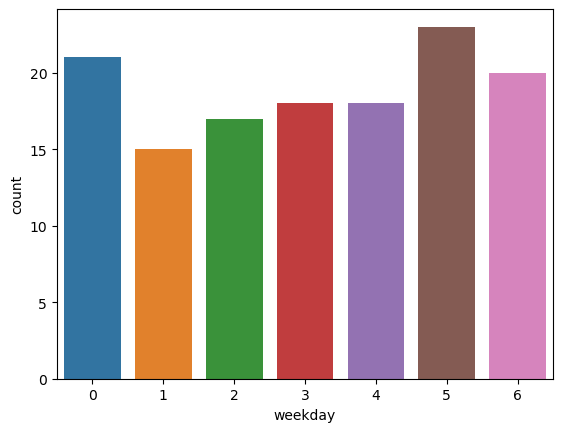

In [36]:
sns.countplot(x='weekday', data=test_df)
plt.show()

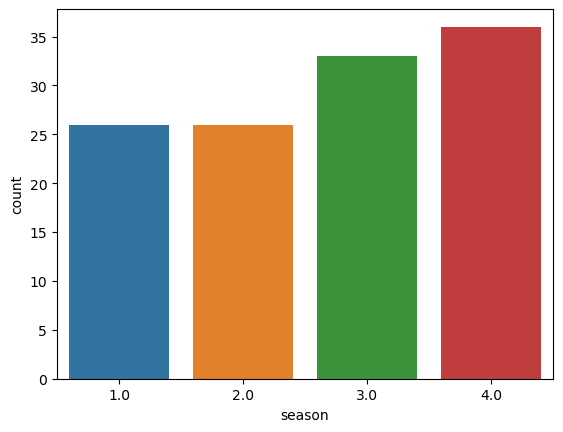

In [37]:
sns.countplot(x='season', data=test_df)
plt.show()

In [38]:
test_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
count,132.000000,121.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,126.000000,132.000000,132.00000,132.000000,132.000000,132.000000,132.000000
mean,378.598485,2.652893,0.515152,6.750000,0.022727,3.106061,0.704545,1.371212,19.844301,0.477679,93.645418,0.185349,749.55303,0.166667,999.825758,3755.166667,4754.992424
std,221.672024,1.123319,0.501674,3.497818,0.149600,2.057411,0.457985,0.558150,7.827241,0.173988,21.467624,0.068409,178.50004,0.374098,2313.057147,1651.661972,3118.721529
min,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.895700,0.117930,0.000000,0.042304,458.00000,0.000000,9.000000,416.000000,431.000000
25%,195.500000,2.000000,0.000000,3.750000,0.000000,1.000000,0.000000,1.000000,13.300000,0.325754,80.692913,0.135898,583.50000,0.000000,330.750000,2532.750000,3289.500000
50%,387.500000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,19.200000,0.470002,93.468750,0.179102,745.00000,0.000000,693.500000,3705.000000,4621.000000
75%,579.250000,4.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,27.366675,0.635919,107.484413,0.227141,918.00000,0.000000,1138.500000,5112.000000,6145.250000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,33.933300,0.840896,139.500000,0.385571,1028.00000,1.000000,26506.000000,6803.000000,32472.000000


In [39]:
test_df = test_df.astype({'instant': 'float', 'yr':'float', 'mnth':'float', 'holiday':'float', 'weekday':'float', 'workingday':'float', 'weathersit':'float', 'leaflets':'float',  'price reduction':'float',  'casual':'float',  'registered':'float',  'cnt':'float'})

In [40]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant          132 non-null    float64
 1   dteday           132 non-null    object 
 2   season           121 non-null    float64
 3   yr               132 non-null    float64
 4   mnth             132 non-null    float64
 5   holiday          132 non-null    float64
 6   weekday          132 non-null    float64
 7   workingday       132 non-null    float64
 8   weathersit       132 non-null    float64
 9   temp             132 non-null    float64
 10  atemp            132 non-null    float64
 11  hum              126 non-null    float64
 12  windspeed        132 non-null    float64
 13  leaflets         132 non-null    float64
 14  price reduction  132 non-null    float64
 15  casual           132 non-null    float64
 16  registered       132 non-null    float64
 17  cnt             

In [41]:
#filter the df based on the quanntile (still have to figure out, which quantile percentage is the right one)
#q = test_df["casual"].quantile(0.9)
#q = train_df.iloc[:, 2:].quantile(0.9)
#print(q)
#handeled_df = test_df[test_df['casual'] < q]

In [42]:
#fixing every
#for i in test_df['windspeed']:
#    if i < 0:
#        test_df['windspeed'] = test_df['windspeed'].replace(i, 0)

#for i in test_df['hum']:
#    if i > 100:
#        test_df['hum'] = test_df['hum'].replace(i, 100)


#handeled_df[['windspeed', 'hum']].describe()


#handeled_df['windspeed'] = handeled_df['windspeed'].drop(handeled_df[handeled_df['windspeed'] < 0].index)
#handeled_df.describe()

In [43]:
test_df['hum']

0      108.06255
1       75.65220
2       81.81255
3            NaN
4      105.25005
         ...    
127     92.31255
128     90.18750
129    127.31250
130     74.68755
131    119.43750
Name: hum, Length: 132, dtype: float64

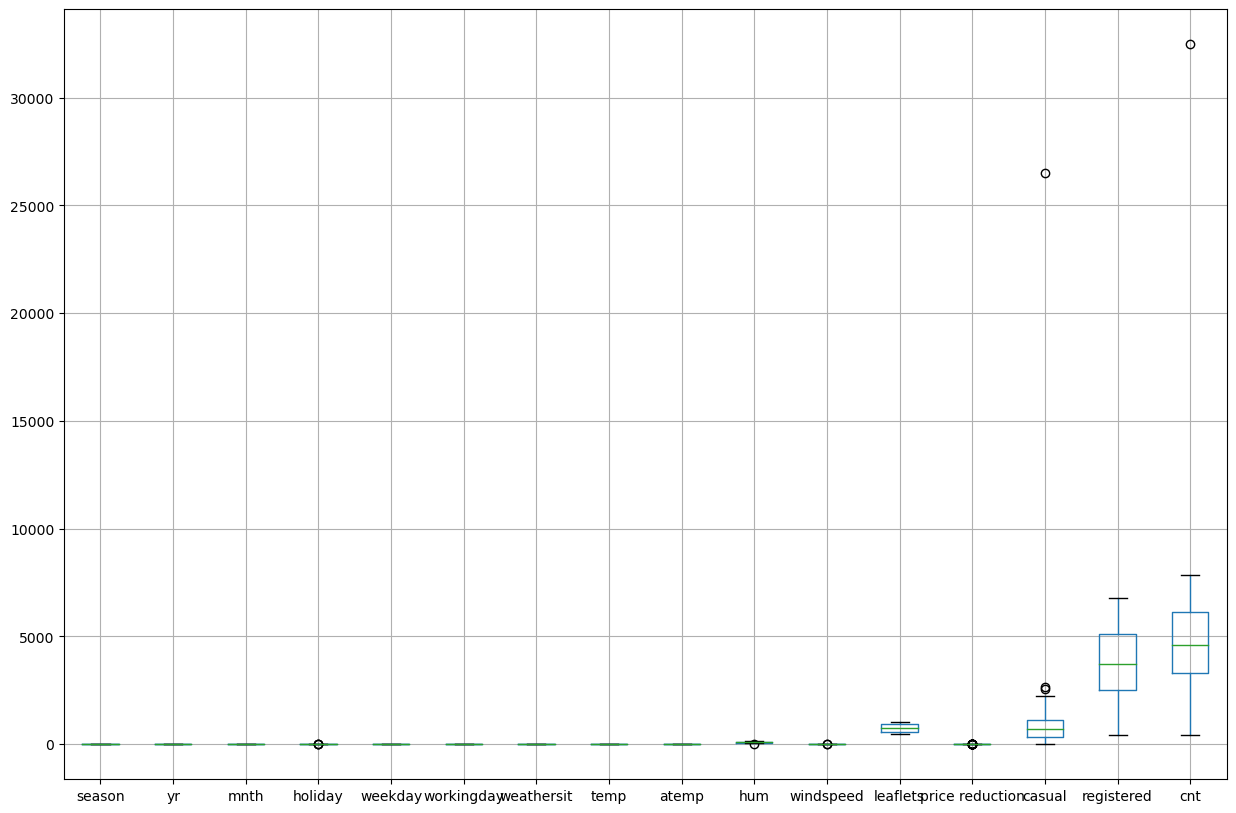

In [44]:
boxplot = test_df.iloc[:, 1:].boxplot(figsize=(15, 10))
plt.show()

In [45]:
test_df[['hum', 'casual']].describe()

,hum,casual
count,126.000000,132.000000
mean,93.645418,999.825758
std,21.467624,2313.057147
min,0.000000,9.000000
25%,80.692913,330.750000
50%,93.468750,693.500000
75%,107.484413,1138.500000
max,139.500000,26506.000000


In [46]:
#Again, alot of hum values are over 100, so we have some outliers here
print(len(test_df[test_df["hum"] > 100]))
#Because of the amount of outliers, we delete hum again 
test_df = test_df.drop('hum', axis=1)

45


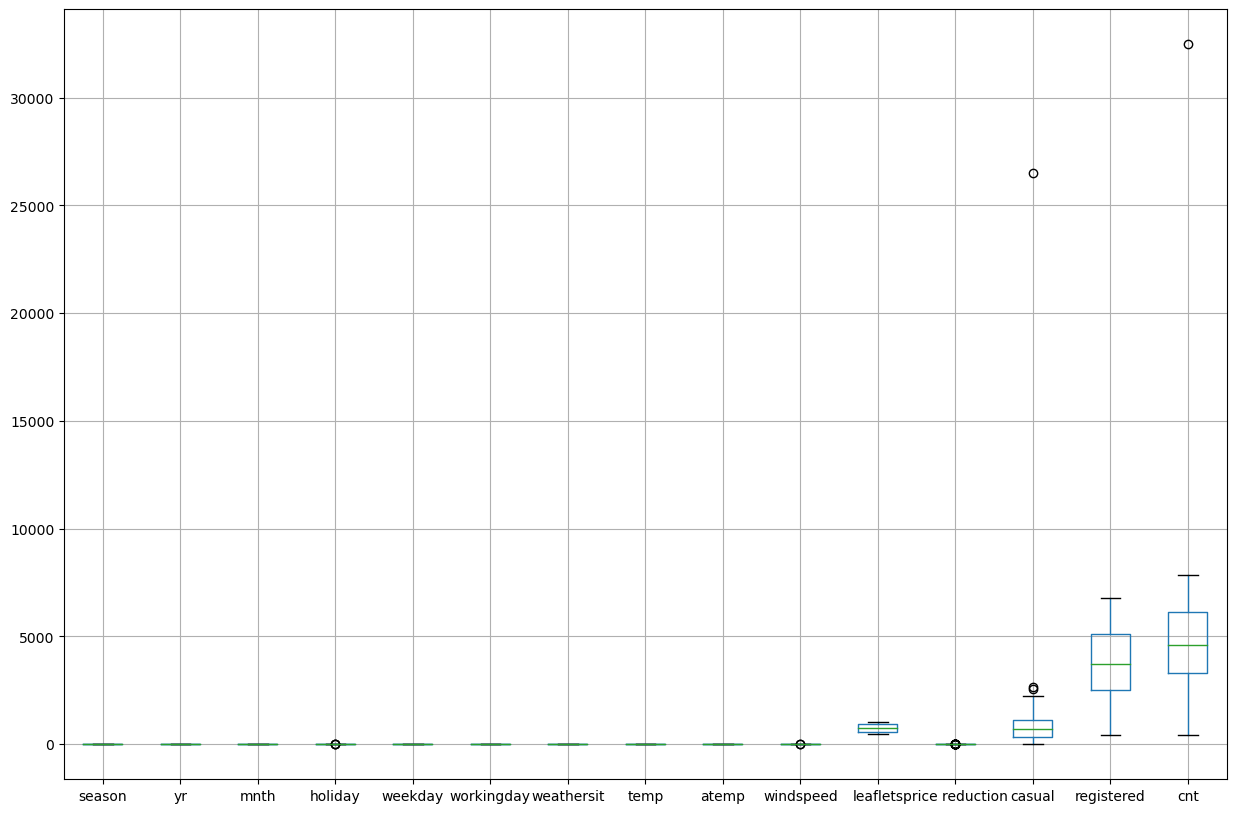

In [47]:
boxplot = test_df.iloc[:, 1:].boxplot(figsize=(15, 10))
plt.show()